In [37]:
    #/content/drive/My Drive/DadosAlura/analises de faces/imagens-aula03    caminho

import os
import cv2 
import matplotlib.pyplot as plt
from os import listdir, path, makedirs

from os.path import isfile,join

import shutil

import numpy as np
from sklearn.metrics import accuracy_score



caminho = './imagens/'
cropped = './imagens/cropped_faces/'

In [2]:
imagem_face_1 = cv2.imread(caminho+'cropped_faces/s01_01.jpg')
imagem_face_1 = cv2.cvtColor( imagem_face_1,cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread(caminho+ 'cropped_faces/s02_01.jpg')
imagem_face_2 = cv2.cvtColor( imagem_face_2,cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread(caminho+'cropped_faces/s03_01.jpg')
imagem_face_3 = cv2.cvtColor( imagem_face_3,cv2.COLOR_BGR2RGB)

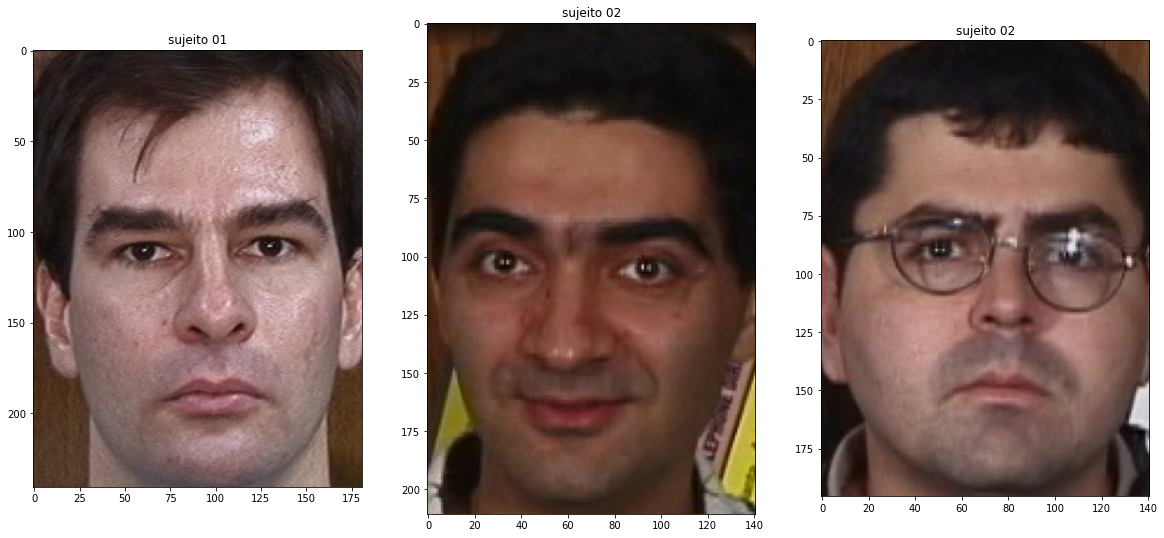

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('sujeito 01')
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title('sujeito 02')
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title('sujeito 02')
plt.imshow(imagem_face_3)

plt.show()

In [4]:


lista_face_arq = [f for f in listdir(cropped) if isfile(join(cropped,f))]

In [5]:
lista_face_arq[0]

's01_01.jpg'

In [6]:
len(lista_face_arq)

750

In [7]:
faces_path_treino = cropped+"faces_path_treino/"
faces_path_teste = cropped+"faces_path_teste/"
if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_face_arq:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(cropped + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(cropped + arq, faces_path_teste + arq)

In [8]:
def padronizar_img(path_img):
    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return img


In [9]:
list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino,f))]

In [10]:
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste,f))]

In [11]:
dados_treinamento, sujeitos = [], []

In [12]:
for i,  arq in enumerate(list_faces_treino):
    img_path = faces_path_treino + arq
    img = padronizar_img(img_path)
    dados_treinamento.append(img)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [13]:
len(dados_treinamento)

500

In [14]:
len(sujeitos)

500

In [15]:
dados_teste, sujeitos_teste = [], []

In [16]:
for i,  arq in enumerate(list_faces_teste):
    img_path = faces_path_teste + arq
    img = padronizar_img(img_path)
    dados_teste.append(img)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [17]:
len(dados_teste)

250

In [18]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

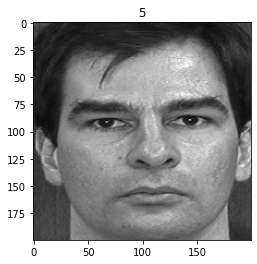

In [19]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '1')

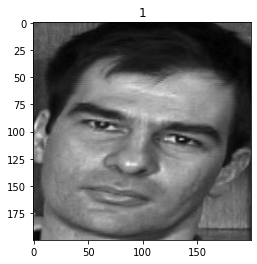

In [20]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

## Padronizando imagens



```
#mediana do altura
mediana_altura = np.median([roi_1.shape[0], roi_2.shape[0], roi_3.shape[0]])
print(mediana_altura)



#mediana do comprimento
mediana_comprimento = np.median([roi_1.shape[1], roi_2.shape[1], roi_3.shape[1]])
print(mediana_comprimento)


resize das imgs

rosto_1 = cv2.resize(roi_1, (162, 162), interpolation=cv2.INTER_LANCZOS4)
rosto_2 = cv2.resize(roi_2, (162, 162), interpolation=cv2.INTER_LANCZOS4)
rosto_3 = cv2.resize(roi_3, (162, 162), interpolation=cv2.INTER_LANCZOS4)



plotando as imgs
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title("Pessoa 1")
plt.imshow(rosto_1)

plt.subplot(132)
plt.title("Pessoa 2")
plt.imshow(rosto_2)

plt.subplot(133)
plt.title("Pessoa 3")
plt.imshow(rosto_3)

plt.show()



#modificação dos formatos
rosto_1_bgr = cv2.cvtColor(rosto_1, cv2.COLOR_RGB2BGR)
rosto_2_bgr = cv2.cvtColor(rosto_2, cv2.COLOR_RGB2BGR)
rosto_3_bgr = cv2.cvtColor(rosto_3, cv2.COLOR_RGB2BGR)

cv2.imwrite("face_1.png", rosto_1_bgr)
cv2.imwrite("face_2.png", rosto_2_bgr)
cv2.imwrite("face_3.png", rosto_3_bgr

```



In [21]:
sujeitos = np.asarray(sujeitos,dtype = np.int32)
sujeitos_teste = np.asarray(sujeitos_teste,dtype = np.int32)

In [40]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [41]:
modelo_eingenfaces.train(dados_treinamento,sujeitos)

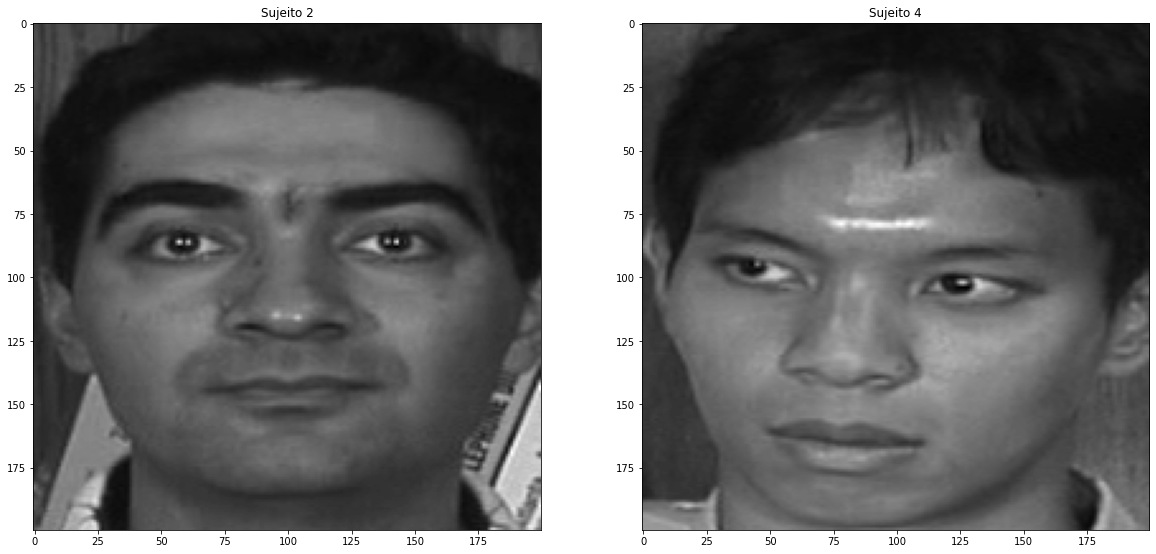

In [42]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap='gray')


plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap='gray')


plt.show()

In [43]:
predict = modelo_eingenfaces.predict(dados_teste[7])
predict

(2, 3820.2138342716853)

In [44]:
predict = modelo_eingenfaces.predict(dados_teste[19])
predict

(4, 3120.608872845703)

In [45]:
modelo_fisher = cv2.face.FisherFaceRecognizer_create()

In [46]:
modelo_fisher.train(dados_treinamento,sujeitos)

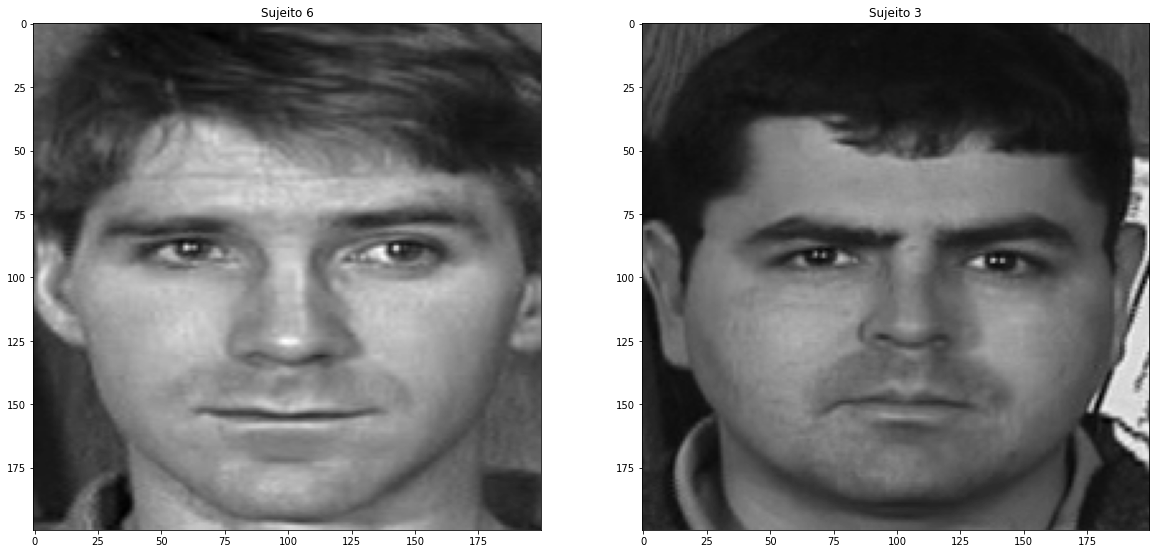

In [47]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[25]))
plt.imshow(dados_teste[25], cmap='gray')


plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[10]))
plt.imshow(dados_teste[10], cmap='gray')


plt.show()

In [48]:
pred= modelo_fisher.predict(dados_teste[25])
pred

(6, 722.6253010910809)

In [49]:
pred= modelo_fisher.predict(dados_teste[10])
pred

(3, 762.229025428225)

In [50]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [51]:
modelo_lbph.train(dados_treinamento,sujeitos)

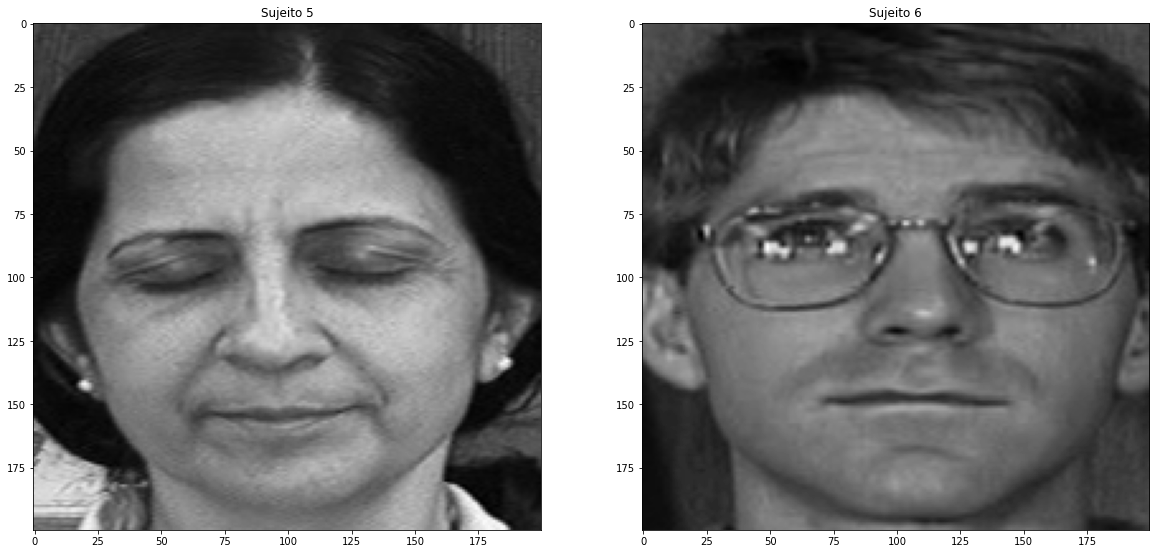

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap='gray')


plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap='gray')


plt.show()

In [53]:
predict_lbph = modelo_lbph.predict(dados_teste[21])
predict_lbph

(5, 32.938584374874814)

In [54]:
predict_lbph = modelo_lbph.predict(dados_teste[27])
predict_lbph

(6, 36.49919959564635)

In [55]:
y_pred_eingenfaces=[]

In [57]:
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [58]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste,y_pred_eingenfaces)

In [59]:
acuracia_eingenfaces

0.724

In [60]:
y_pred_fisherfaces=[]

In [61]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisher.predict(item)[0])

In [63]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste,y_pred_fisherfaces)
acuracia_fisherfaces

0.52

In [64]:
y_pred_lbph = []
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

acuracia_lbph = accuracy_score(sujeitos_teste,y_pred_lbph)
acuracia_lbph

0.792